In [268]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
import random 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef

In [182]:
#load data 
mushroom = pd.read_csv("c:\\Users\\sarah\\OneDrive\\Documents\\DS3001_ML\\secondary_data.csv", delimiter=';')
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [183]:
mushroom.shape

(61069, 21)

In [184]:
mushroom.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [185]:
#drop missing data  
to_drop = list([3, 6, 7, 11, 12, 14, 15, 17, 18])
mushroom = mushroom.drop(mushroom.columns[to_drop], axis=1)
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-color            61069 non-null  object 
 6   stem-height           61069 non-null  float64
 7   stem-width            61069 non-null  float64
 8   stem-color            61069 non-null  object 
 9   has-ring              61069 non-null  object 
 10  habitat               61069 non-null  object 
 11  season                61069 non-null  object 
dtypes: float64(3), object(9)
memory usage: 5.6+ MB


In [186]:
#convert to category
mushroom[['class', 'cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-color', 'stem-color', 'has-ring', 'habitat', 'season']] = mushroom[['class', 'cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-color', 'stem-color', 'has-ring', 'habitat', 'season']].astype('category')

In [187]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   class                 61069 non-null  category
 1   cap-diameter          61069 non-null  float64 
 2   cap-shape             61069 non-null  category
 3   cap-color             61069 non-null  category
 4   does-bruise-or-bleed  61069 non-null  category
 5   gill-color            61069 non-null  category
 6   stem-height           61069 non-null  float64 
 7   stem-width            61069 non-null  float64 
 8   stem-color            61069 non-null  category
 9   has-ring              61069 non-null  category
 10  habitat               61069 non-null  category
 11  season                61069 non-null  category
dtypes: category(9), float64(3)
memory usage: 1.9 MB


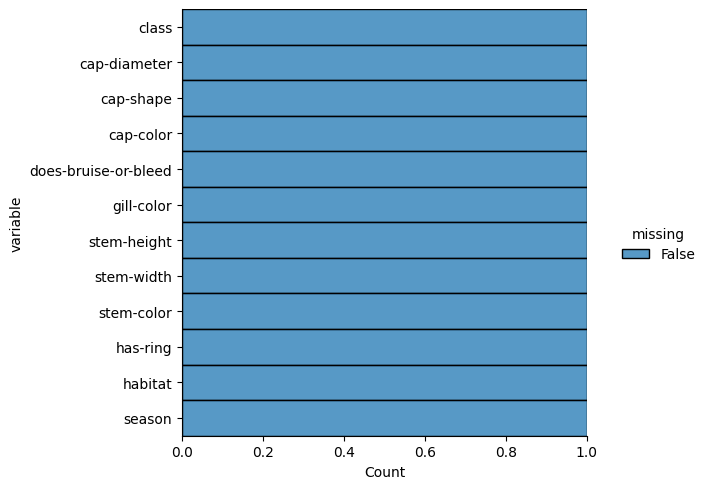

In [188]:
#check missing data 
sns.displot(
    data=mushroom.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [156]:
# Question 
#Can cap color be used to determine class? 
#Using cap color to build the model 

In [157]:
#build knn model 
#data is already normalized 

In [189]:
# onehot encode the data to convert categorical variables into columns with 0 and 1 rows 
category = mushroom.select_dtypes(include='category').columns
category

Index(['class', 'cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-color',
       'stem-color', 'has-ring', 'habitat', 'season'],
      dtype='object')

In [190]:
#one hot encode, get new columns with True or False values 
encoded = pd.get_dummies(mushroom[category])
encoded.head() 

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,cap-color_b,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [191]:
# drop the old columns and join new encoded columns 
mushroom = mushroom.drop(category, axis=1)
mushroom = mushroom.join(encoded)

mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cap-diameter            61069 non-null  float64
 1   stem-height             61069 non-null  float64
 2   stem-width              61069 non-null  float64
 3   class_e                 61069 non-null  bool   
 4   class_p                 61069 non-null  bool   
 5   cap-shape_b             61069 non-null  bool   
 6   cap-shape_c             61069 non-null  bool   
 7   cap-shape_f             61069 non-null  bool   
 8   cap-shape_o             61069 non-null  bool   
 9   cap-shape_p             61069 non-null  bool   
 10  cap-shape_s             61069 non-null  bool   
 11  cap-shape_x             61069 non-null  bool   
 12  cap-color_b             61069 non-null  bool   
 13  cap-color_e             61069 non-null  bool   
 14  cap-color_g             61069 non-null

In [192]:
#drop nonpredictive columms 
drop_more = list(range(20, 56))
drop_more.extend([0, 1, 2, 5, 6, 7, 8, 9, 10, 11])
mushroom = mushroom.drop(mushroom.columns[drop_more], axis=1)
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   class_e      61069 non-null  bool 
 1   class_p      61069 non-null  bool 
 2   cap-color_b  61069 non-null  bool 
 3   cap-color_e  61069 non-null  bool 
 4   cap-color_g  61069 non-null  bool 
 5   cap-color_k  61069 non-null  bool 
 6   cap-color_l  61069 non-null  bool 
 7   cap-color_n  61069 non-null  bool 
 8   cap-color_o  61069 non-null  bool 
 9   cap-color_p  61069 non-null  bool 
 10  habitat_l    61069 non-null  bool 
 11  habitat_m    61069 non-null  bool 
 12  habitat_p    61069 non-null  bool 
 13  habitat_u    61069 non-null  bool 
 14  habitat_w    61069 non-null  bool 
 15  season_a     61069 non-null  bool 
 16  season_s     61069 non-null  bool 
 17  season_u     61069 non-null  bool 
 18  season_w     61069 non-null  bool 
dtypes: bool(19)
memory usage: 1.1 MB


In [193]:
mushroom.head()

,class_e,class_p,cap-color_b,cap-color_e,cap-color_g,cap-color_k,cap-color_l,cap-color_n,cap-color_o,cap-color_p,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
1,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
3,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True


In [194]:
mushroom[['cap-color_b', 'cap-color_e', 'cap-color_g', 'cap-color_k']]

,cap-color_b,cap-color_e,cap-color_g,cap-color_k
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,True,False,False
4,False,False,False,False
...,...,...,...,...
61064,False,False,False,False
61065,False,False,False,False
61066,False,False,False,False
61067,False,False,False,False


In [195]:
mushroom['cap-color_b'].value_counts().get(True,0)
mushroom['cap-color_e'].value_counts().get(True,0)

4035

In [196]:
# scale
mushroom[['cap-color_b','cap-color_e','cap-color_g','cap-color_k','cap-color_l','cap-color_n','cap-color_o','cap-color_p']]=StandardScaler().fit_transform(mushroom[['cap-color_b','cap-color_e','cap-color_g','cap-color_k','cap-color_l','cap-color_n','cap-color_o','cap-color_p']])

In [197]:
x = mushroom[['cap-color_b','cap-color_e','cap-color_g','cap-color_k','cap-color_l','cap-color_n','cap-color_o','cap-color_p']] #independent variables
y = mushroom['class_e'] #dependent variable

In [198]:
#partition train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, stratify = y, random_state=21)


In [199]:
#partition tune 
x_tune, x_test, y_tune, y_test = train_test_split(x_test,y_test, train_size = 0.50, stratify = y_test,random_state=49)

In [200]:
# train classifier for k=10 
mush_knn = KNeighborsClassifier(n_neighbors=10)
mush_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [201]:
# accuracy of the KNN model on tune set 
print(mush_knn.score(x_tune, y_tune)) 
# 56.7%

0.5673580786026201


In [202]:
# probabilities for first 5 samples in tune set 
mush_prob1 = mush_knn.predict_proba(x_tune) 
print(mush_prob1[:5]) 

[[0.7 0.3]
 [0.4 0.6]
 [0.7 0.3]
 [0.7 0.3]
 [0.9 0.1]]


In [203]:
# prediction for first 5 samples in tune set 
mush_pred1 =  mush_knn.predict(x_tune)
print(mush_pred1[:5]) 

[False  True False False False]


In [204]:
# creating data frame 
final_model= pd.DataFrame({'neg_prob':mush_prob1[:, 0],
'pred':mush_pred1,'target':y_tune, 'pos_prob':mush_prob1[:, 1]})

final_model

,neg_prob,pred,target,pos_prob
15929,0.7,False,True,0.3
5736,0.4,True,True,0.6
21372,0.7,False,True,0.3
8677,0.7,False,True,0.3
17127,0.9,False,False,0.1
...,...,...,...,...
60383,0.7,False,True,0.3
52298,0.9,False,True,0.1
42721,0.7,False,True,0.3
13057,0.9,False,False,0.1


In [205]:
# confusion matrix 
# a lot of false negatives 
metrics.confusion_matrix(final_model.target,final_model.pred)

array([[4739,  344],
       [3619,  458]], dtype=int64)

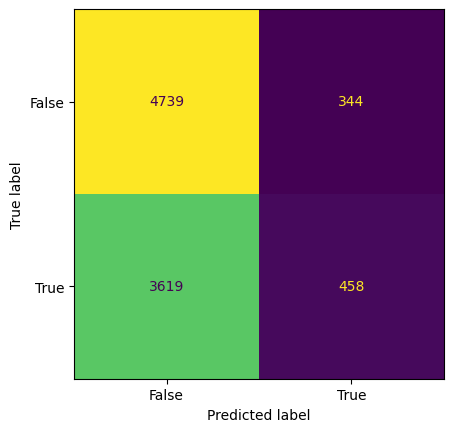

In [206]:
# confusion matrix 
metrics.ConfusionMatrixDisplay.from_predictions(final_model.target,final_model.pred, display_labels = [False, True], colorbar=False)

In [207]:
# choosing the right k value

def chooseK(k, x_train, y_train, x_test, y_test):
    random.seed(1)
    print("calculating... ", k, "k") 
    class_knn = KNeighborsClassifier(n_neighbors=k)
    class_knn.fit(x_train, y_train)
    # calculate accuracy
    accu = class_knn.score(x_test, y_test)
    return accu

In [208]:
test = pd.DataFrame({'k':list(range(1,51,2)),'accu':[chooseK(i, x_train, y_train, x_test, y_test) for i in list(range(1, 51, 2))]})

calculating...  1 k
calculating...  3 k
calculating...  5 k
calculating...  7 k
calculating...  9 k
calculating...  11 k
calculating...  13 k
calculating...  15 k
calculating...  17 k
calculating...  19 k
calculating...  21 k
calculating...  23 k
calculating...  25 k
calculating...  27 k
calculating...  29 k
calculating...  31 k
calculating...  33 k
calculating...  35 k
calculating...  37 k
calculating...  39 k
calculating...  41 k
calculating...  43 k
calculating...  45 k
calculating...  47 k
calculating...  49 k


In [209]:
#k value results 
print(test.head())

   k      accu
0  1  0.558673
1  3  0.526798
2  5  0.527344
3  7  0.527344
4  9  0.564786


In [210]:
test = test.sort_values(by=['accu'], ascending=False)
print(test.head())

     k      accu
12  25  0.572208
13  27  0.572208
23  47  0.572208
22  45  0.572208
21  43  0.572208


In [211]:
best_knn = KNeighborsClassifier(n_neighbors=25)
best_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [214]:
# accuracy of the k = 25 on tune set 
print(best_knn.score(x_tune, y_tune)) 

# 57.696%

0.5769650655021834


In [219]:
# probabilities for first 5 samples in tune set with k = 25
mush_prob2 = best_knn.predict_proba(x_tune) 
mush_prob2[:5]

array([[0.6 , 0.4 ],
       [0.36, 0.64],
       [0.4 , 0.6 ],
       [0.4 , 0.6 ],
       [0.64, 0.36]])

In [221]:
# prediction for first 5 samples in tune set with k = 25
mush_pred2 =  best_knn.predict(x_tune)
mush_pred2[:5]

array([False,  True,  True,  True, False])

In [222]:
# creating data frame 
final_model_2= pd.DataFrame({'neg_prob':mush_prob2[:, 0],
'pred':mush_pred2,'target':y_tune, 'pos_prob':mush_prob2[:, 1]})

final_model_2

,neg_prob,pred,target,pos_prob
15929,0.60,False,True,0.40
5736,0.36,True,True,0.64
21372,0.40,True,True,0.60
8677,0.40,True,True,0.60
17127,0.64,False,False,0.36
...,...,...,...,...
60383,0.40,True,True,0.60
52298,0.64,False,True,0.36
42721,0.40,True,True,0.60
13057,0.64,False,False,0.36


In [223]:
# updated confusion matrix 
metrics.confusion_matrix(final_model_2.target,final_model_2.pred)
# a little better 

array([[2905, 2178],
       [1697, 2380]], dtype=int64)

In [227]:
# adjust thresholds 
def adjust_thres(x, y, z):
    """
    x=pred_probabilities
    y=threshold
    z=tune_outcome
    """
    thres = pd.DataFrame({'new_preds': [1 if i > y else 0 for i in x]})
    thres.new_preds = thres.new_preds.astype('category')
    con_mat = confusion_matrix(z, thres)
    print(con_mat)

In [267]:
# testing thresholds 
print(adjust_thres(final_model_2.pos_prob,.76,final_model_2.target))

print(adjust_thres(final_model_2.pos_prob,.15,final_model_2.target))

[[5083    0]
 [4077    0]]
None
[[   0 5083]
 [   0 4077]]
None


In [233]:
# prevalence 
# 44.5%
print(mushroom['class_e'].value_counts()[1] / mushroom['class_e'].count())

0.44508670520231214


C:\Users\sarah\AppData\Local\Temp\ipykernel_27652\110484635.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(mushroom['class_e'].value_counts()[1] / mushroom['class_e'].count())


In [238]:
#check accuracy of k = 25 on test data 
print(best_knn.score(x_test, y_test))
# 57.22

0.5722082742058727


In [240]:
# overall accuracy of model 
Total_Accuracy = (2905 + 2380) / (2905 + 2380 + 1697 + 2178)
print(Total_Accuracy)
# 57.696

0.5769650655021834


In [239]:
# TPR and FPR with k = 25 
# TP = 2905
# FN = 2178
# FP = 1697
# TN = 2380

TPR = 2905/(2905 + 2178) # TP/(TP + FN)
FPR = 1697/(1697 + 2380) # FP/(FP + TN)

print('TPR:', TPR, 'FPR:', FPR)

TPR: 0.5715128860908912 FPR: 0.4162374294824626


Text(0.5, 0, 'False Positive Rate')

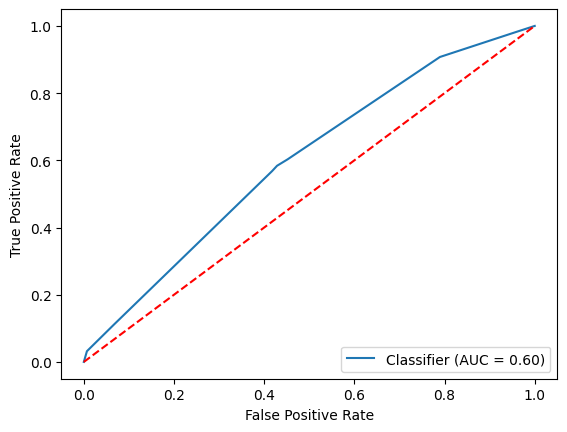

In [234]:
#ROC Curve and the AUC 

print(metrics.RocCurveDisplay.from_predictions(final_model_2.target,
final_model_2.pos_prob))

plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [235]:
# AUC value 
print(metrics.roc_auc_score(final_model_2.target, final_model_2.pos_prob))

0.5993925415005681


In [236]:
# LogLoss 
print(metrics.log_loss(final_model_2.target, final_model_2.pos_prob))

0.6786882175096631


In [237]:
# F1 score 
print(metrics.f1_score(final_model_2.target, final_model_2.pred))

0.5512449334105385


In [243]:
# Kappa 
print(cohen_kappa_score(y_tune, mush_pred2))

0.15348355528225788


In [269]:
# Matthews Correlation Coefficient (MCC) 
print(matthews_corrcoef(y_tune, mush_pred2))

0.15433796087150023


In [ ]:
#Part 3. In consideration of all the metrics you just used are there a few that seem more important given the question you are asking? 
    # Sensitivity/TPR is an important metric given my question regarding the relationship between mushroom cap color and class. Sensitivity tells us how many samples the model correctly identified. High sensitivity means the model is effective at correctly identifying class based on cap color. 
    # Since sensitivity was about 0.5715 the model was able to correctly identify class based on cap color for more than half of the samples, but the model can still be improved for higher sensitivity. 
    # ROC Curve and AUC would be a less important metric given my question since there are only two classes I would assign an instance to, class_e or not (therefore class_p) 

#Part 4. Consider where miss-classification errors are occurring, is there a pattern? If so discuss this pattern and why you think this is the case. 
    # I may have come across data labeling errors considering there were eight cap colors as independent variables. I could have forgotten to include some cap colors when labeling data. 
    # There also may not be a strong relationship between mushroom cap color and class. There may be a better identification independent variable to determine mushroom class. 

#Part 5. Based on your exploration in Part 3/4, change the threshold using the function provided (in the in-class example), what differences do you see in the evaluation metrics? Does it get better at addressing your question or not, why?  
    # Threshold changed from the original model at .30 and .60, both had less TP and TN in the confusion matrix than the original model. The original model had the best distribution of TP and TN than other thresholds. 
    # At .76 the model made zero TP or FP instances  
    # At .15 the model made zero TN or FN instances 

#Part 6. Use a metric we did not discuss in class. Once you have the output summarize in a sentence or two what the metric is and what it means in the context of your question.
    # The Matthews Correlation Coefficient (MCC) is used to assess the quality of binary classification models. It considers all TP, TN, FP, and FN to account for the possibility of chance agreement. Since accuracy is 57.6% I believe the relationship between mushroom cap color and class may be chance agreement. 
    # Since MCC was about 0.1543, the model's predictions are slightly better than random chance, but the model still has room for improvement. Higher MCC values represent better model performance. 
    # MCC = 0 indicates random chance

#Part 7. Summarize your findings speaking through your question, what does the evaluation outputs mean when answering the question? Also, make recommendations on improvements. 
    # The evaluation metrics for the model prove that there is a relationship between the eight mushroom cap colors and two mushroom classes in the data set. 
    # However, with the current model, mushroom cap color only correctly identified mushroom class slightly better than random chance. 

#Recommendations for improvement might include gathering more data, adjusting the threshold, adding new features, changing your questions or maybe that it's working fine at the current level and nothing should be done.
    # To improve the model I would add more features that are numerical rather than boolean to determine mushroom class. Numerical values are highly specific and may be more accurate than boolean values at determining mushroom class. 
    # I would add mushroom stem height as an independent variable with cap color to determine mushroom class, so cap color and stem are being considered in the model and independent variables are both numeric and boolean. 